<a href="https://colab.research.google.com/github/ma22c041/ma22c041_2023_PL/blob/main/Assignment7/predator_pray_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

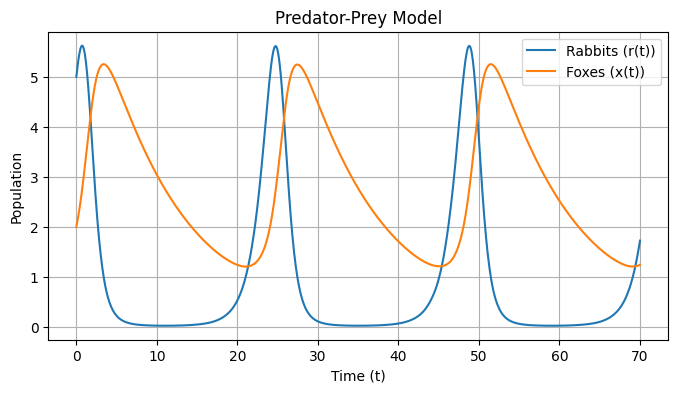

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def predator_prey(t, y):                                                                           # Define the predator-prey ODE system
    r, x = y
    alpha = 1.1   #given data
    beta = 0.4
    delta = 0.1
    gamma = 0.1
    drdt = alpha * r - beta * r * x
    dxdt = delta * r * x - gamma * x
    return [drdt, dxdt]

initial_conditions = [5, 2]                                                                         # Initial conditions
t_span = (0, 70)                                                                                    #   given Time span

sol = solve_ivp(predator_prey, t_span, initial_conditions, t_eval=np.linspace(0, 70, 1000))         #Solve the ODE system
t = sol.t                                                                                           # Extract solutions
r = sol.y[0]
x = sol.y[1]
plt.figure(figsize=(8, 4))                                                                          # Plot the solutions
plt.plot(t, r, label='Rabbits (r(t))')                                                              #r(t) denoting rabbit
plt.plot(t, x, label='Foxes (x(t))')                                                                #x(t) denoting foxes
plt.xlabel('Time (t)')
plt.ylabel('Population')
plt.legend()
plt.title('Predator-Prey Model')
plt.grid(True)
plt.show()


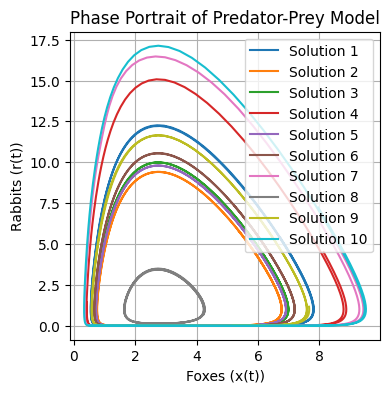

In [ ]:
# take 2 : Generate 10 random initial conditions
np.random.seed(0)                                                                                        # For reproducibility
num_solutions = 10
initial_conditions_list = np.random.uniform(1, 9, size=(num_solutions, 2))

plt.figure(figsize=(4, 4))
for i in range(num_solutions):
    sol = solve_ivp(predator_prey, t_span, initial_conditions_list[i], t_eval=np.linspace(0, 70, 1000))  # to Create a phase portrait
    plt.plot(sol.y[1], sol.y[0], label=f'Solution {i + 1}')
plt.xlabel('Foxes (x(t))')
plt.ylabel('Rabbits (r(t))')
plt.title('Phase Portrait of Predator-Prey Model')
plt.legend()
plt.grid(True)
plt.show()


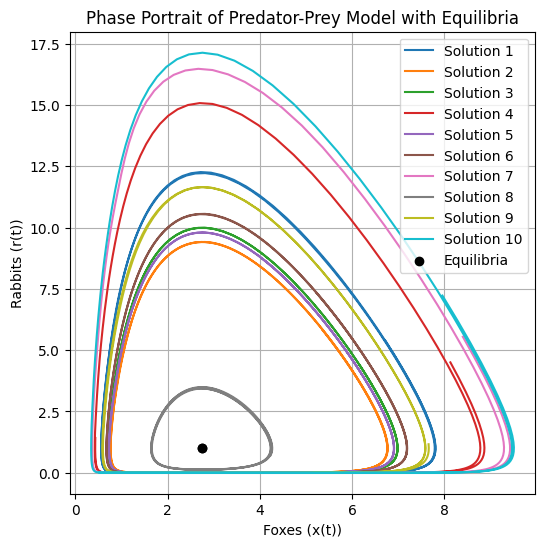

In [ ]:
#  take 3 :Define a function to find equilibria

equilibrium1 = fsolve(equilibrium_equations, [1, 1], args=(alpha, beta, delta, gamma))                  # Find equilibria using fsolve
equilibrium2 = fsolve(equilibrium_equations, [9, 9], args=(alpha, beta, delta, gamma))

plt.figure(figsize=(6, 6))                                                                              # Create a phase portrait with equilibria
for i in range(num_solutions):
    sol = solve_ivp(predator_prey, t_span, initial_conditions_list[i], t_eval=np.linspace(0, 70, 1000))
    plt.plot(sol.y[1], sol.y[0], label=f'Solution {i + 1}')

#  now Plotting  equilibria with given data
plt.scatter([equilibrium1[1], equilibrium2[1]], [equilibrium1[0], equilibrium2[0]], color='black', marker='o', label='Equilibria')
plt.xlabel('Foxes (x(t))')
plt.ylabel('Rabbits (r(t))')
plt.title('Phase Portrait of Predator-Prey Model with Equilibria')
plt.legend()
plt.grid(True)
plt.show()
